In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import os
import shutil
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.colors import ListedColormap, BoundaryNorm
#
PD=os.getcwd(); PD
#
import fun_qq as fn


###
---

In [2]:
# PATH
#
# pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
# pathP='/scratch/pk695/FACTS/002_fork/facts/experimentsNZ.230608/nzOG/nzOG.{arg0}.1kloc/output'.format(arg0=ssp)

###
---

<font> Compare the qq for 20000 and 2000 samples </font>

In [3]:
# 1k location and 20k samples.
path20k='/scratch/pk695/FACTS/002_fork/facts/experimentsNZ.230608/nzOG/nzOG.ssp585.1kloc/output/'
data20k=('nzOG.ssp585.1kloc.NZInsarGPS.NZInsarGPS.verticallandmotion_localsl.nc')
# 7k loop location and 2k samples
path2k='/scratch/pk695/FACTS/002_fork/facts/experimentsNZ/nzOG/nzOG.ssp585/output_local_ssp585/'
data2k=('nzOG.ssp585.NZInsarGPS.NZInsarGPS.verticallandmotion_localsl.nc')


In [5]:
d20k= fn.xtract_data_4m_nc(data20k,'sea_level_change',0,2020,2100)
slc20k = d20k['slc']; time20k = d20k['time']

d2k= fn.xtract_data_4m_nc(data2k,'sea_level_change',0,2020,2100)
slc2k = d2k['slc']; time2k = d2k['time']

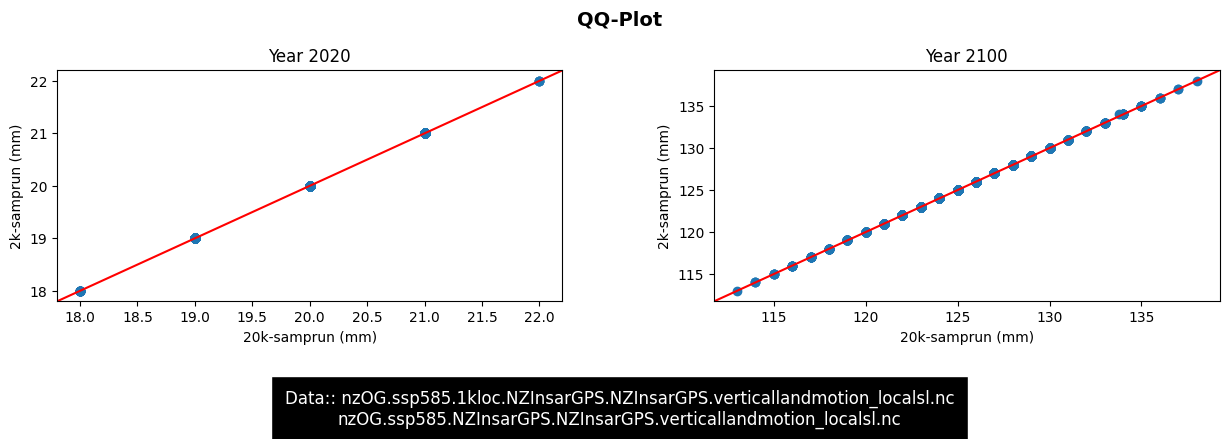

In [59]:
num_cols = 2
num_rows = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3))
fig.subplots_adjust(hspace=.5, wspace=.3)
axno=0
# loop over each year.
for yr0,yr1 in enumerate(time20k):
    # Select var
    if yr1==2020 or yr1==2100:
        xx20k=slc20k[:, yr0];       
        xx2k=slc2k[:, yr0]
        #
        ax=axes[axno]
        sm.qqplot_2samples(xx20k, xx2k, line='45', ax=ax)
        ax.set_xlabel('20k-samprun (mm)')
        ax.set_ylabel('2k-samprun (mm)')
        ax.set_title(f'Year {yr1}')
        axno=axno+1
        #
# ----------------------------------------------------------------------------------------------------------------        
# Plot Title.
fig.text(0.5, 1.05, 'QQ-Plot', fontsize=14, fontweight='bold',ha='center', va='center')
# data
data='Data:: '+data20k.split('/')[-1]+'\n'+data2k.split('/')[-1]
fig.text(0.5, -0.25, data, fontsize=12, ha='center', va='center',color='white',
        bbox={'facecolor': 'black', 'edgecolor': 'white', 'pad': 10})
# ----------------------------------------------------------------------------------------------------------------
plt.show()